# PIP LIST 

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split 
from linear_regression import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

import time
from scipy.sparse import hstack, csr_matrix, issparse
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from linear_regression import LinearRegression
from descents import BaseDescentReg, LossFunction

import warnings
warnings.filterwarnings("ignore")

# DATA

In [2]:
df1 = pd.read_csv('autos.csv')
df1 = df1.drop_duplicates()

df_train, df_test = train_test_split(df1, test_size=0.1, random_state=42)

val_size = 0.1 / 0.9 
df_train, df_val = train_test_split(df_train, test_size=val_size, random_state=42)
scaler = StandardScaler()


# PRICE #
1) clip beetween 450 and 25000,
2) StandardScaler.




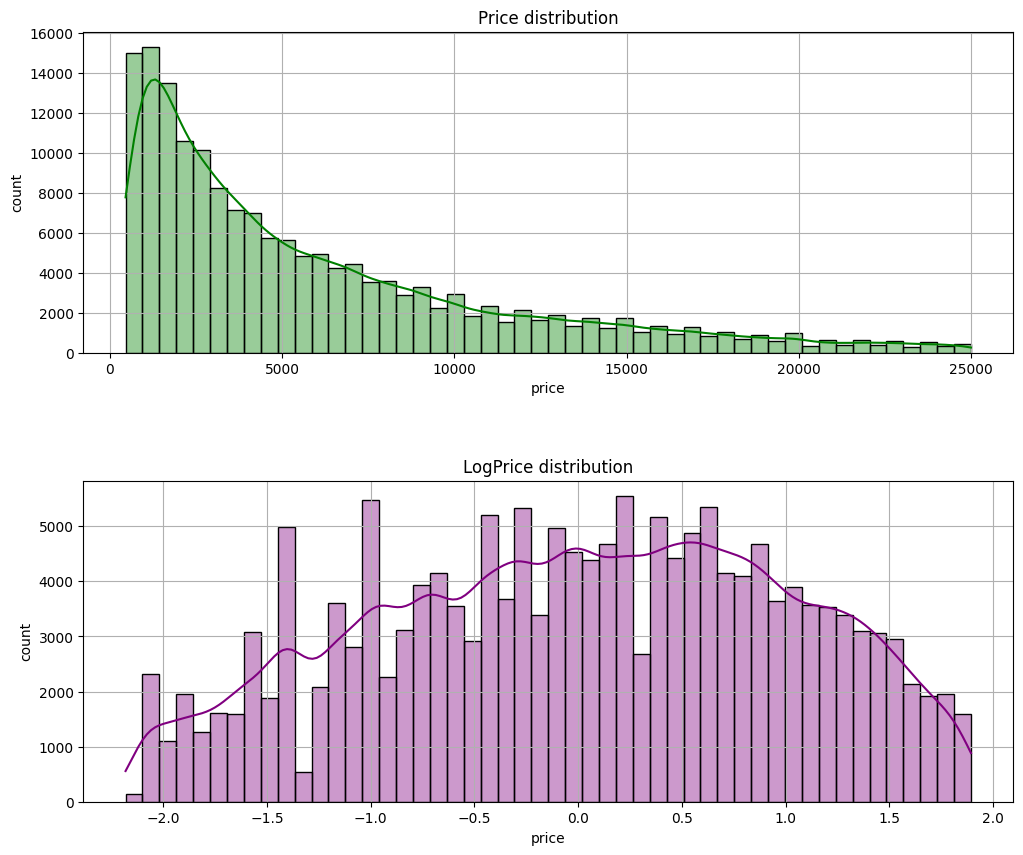

In [3]:
df_train['price'] = df_train['price'].where((df_train['price'] < 25000) & (df_train['price'] > 450))
price_scaled = scaler.fit_transform((np.log1p(df_train[['price']])))

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10)) 
fig.subplots_adjust(hspace=0.4)

sns.histplot(df_train['price'], kde=True, bins=50,  alpha=0.4, color="green", ax=ax[0],)
ax[0].set_xlabel('price')
ax[0].grid(True)
ax[0].set_ylabel('count')
ax[0].set_title('Price distribution')

sns.histplot(price_scaled.ravel(), kde=True, bins=50, alpha=0.4, color="purple", ax=ax[1])
ax[1].set_xlabel('price')
ax[1].set_ylabel('count')
ax[1].grid(True)
ax[1].set_title('LogPrice distribution')
plt.show()


df_train['log_price'] = np.log1p(df_train['price'])

# Correlation

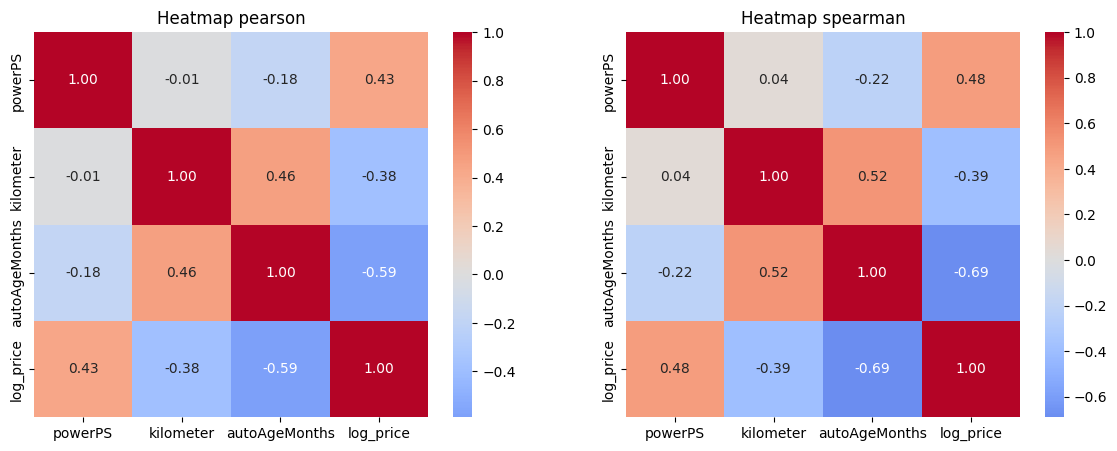

In [4]:
cols = ["powerPS", "kilometer", "autoAgeMonths", "log_price"]

data = df_train[cols].copy()

# Fill in NaN data
imputer = SimpleImputer(strategy="median")
data[cols] = imputer.fit_transform(data[cols])

corr1 = data.corr(method="pearson")
corr2 = data.corr(method="spearman")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

sns.heatmap(corr1, annot=True, cmap="coolwarm", center=0, fmt=".2f", ax=ax[0])
ax[0].set_title("Heatmap pearson")

sns.heatmap(corr2, annot=True, cmap="coolwarm", center=0, fmt=".2f", ax=ax[1])
ax[1].set_title("Heatmap spearman")
plt.show()

# Dependence of a feature on a target variable #

In [5]:
df_train.groupby('brand')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
alfa_romeo,1157.0,4658.853933,4220.211319,475.0,1500.00,3200.0,6590.00,24950.0
audi,15868.0,8243.805331,6323.944490,480.0,2850.00,6800.0,12500.00,24999.0
bmw,19912.0,7853.809512,5981.228028,455.0,2850.00,6500.0,11499.00,24999.0
chevrolet,895.0,6252.417877,4811.955297,500.0,2499.00,4900.0,8994.50,24000.0
chrysler,685.0,4620.659854,4329.965076,500.0,1500.00,2999.0,6500.00,23000.0
citroen,2478.0,4161.195319,3592.909370,490.0,1600.00,2990.0,5500.00,22900.0
dacia,492.0,6031.067073,3551.440875,500.0,3100.00,5125.0,8512.50,16350.0
daewoo,189.0,1257.174603,567.694597,470.0,800.00,1200.0,1500.00,3850.0
daihatsu,284.0,2594.246479,2247.298484,500.0,999.00,1799.5,3499.25,12850.0


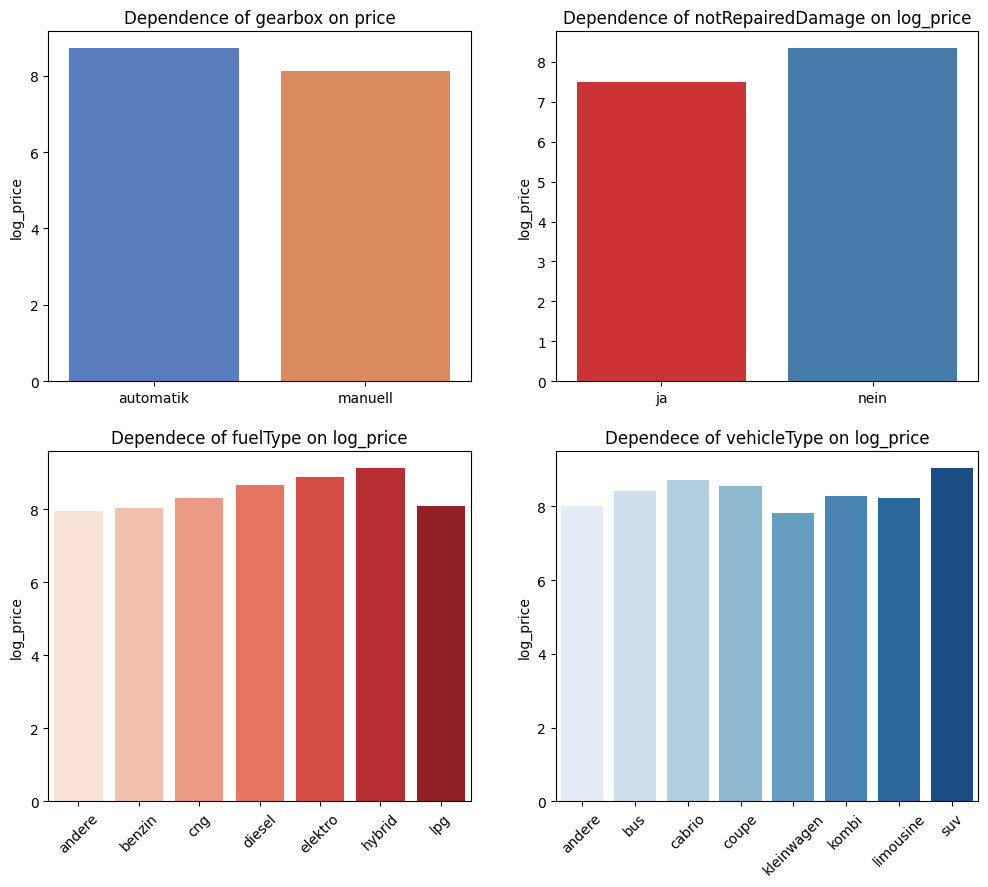

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))


# Gearbox
gear_pr = df_train.groupby('gearbox')['log_price'].mean().reset_index()
sns.barplot(data=gear_pr, x='gearbox', y='log_price', palette='muted', ax=ax[0,0])
ax[0,0].set_xlabel('')
ax[0,0].set_title('Dependence of gearbox on price')

# notRepairedDamage
rep_pr = df_train.groupby('notRepairedDamage')['log_price'].mean().reset_index()
sns.barplot(data=rep_pr, x='notRepairedDamage', y='log_price', palette='Set1', ax=ax[0, 1])
ax[0,1].set_xlabel('')
ax[0,1].set_title('Dependence of notRepairedDamage on log_price')

# fuelType
fuel_pr = df_train.groupby('fuelType')['log_price'].mean().reset_index()
sns.barplot(data=fuel_pr, x= 'fuelType', y='log_price', palette='Reds', ax=ax[1, 0])
ax[1,0].tick_params(axis='x', rotation=45)
ax[1,0].set_xlabel('')
ax[1,0].set_title('Dependece of fuelType on log_price')

# vehicleType
vehicle_pr = df_train.groupby('vehicleType')['log_price'].mean().reset_index()
sns.barplot(data=vehicle_pr, x='vehicleType', y='log_price', palette='Blues', ax=ax[1, 1])
ax[1,1].tick_params(axis='x', rotation=45)
ax[1,1].set_xlabel('')
ax[1,1].set_title('Dependece of vehicleType on log_price')

plt.show()

# Kilometer #
1) StandardScaler

In [7]:
df_train['kilometer'].describe()

count    177829.000000
mean     123703.642263
std       39890.658009
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

Text(0.5, 1.0, 'kilometer distribution')

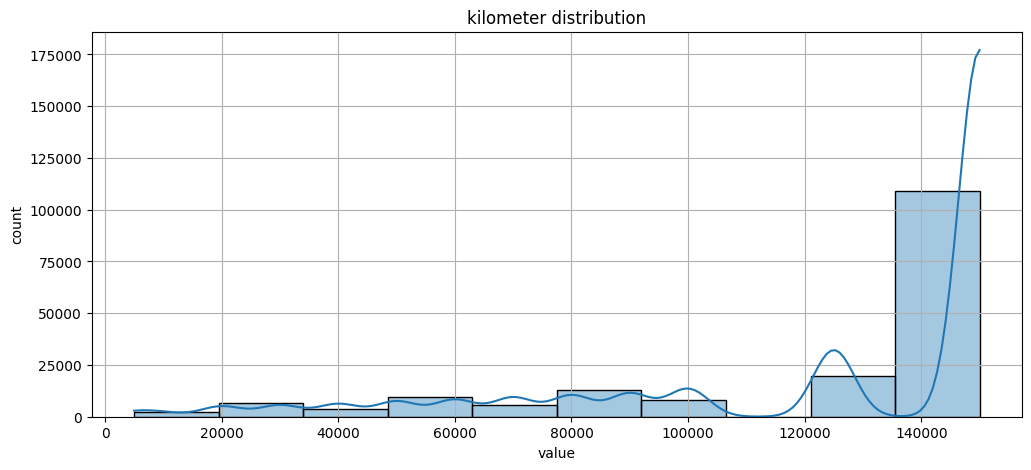

In [8]:
plt.figure(figsize=(12,5))


sns.histplot(df_train['kilometer'], bins=10, kde=True, palette='Set1', alpha=0.4)
plt.xlabel('value')
plt.ylabel('count')
plt.grid(True)
plt.title('kilometer distribution')




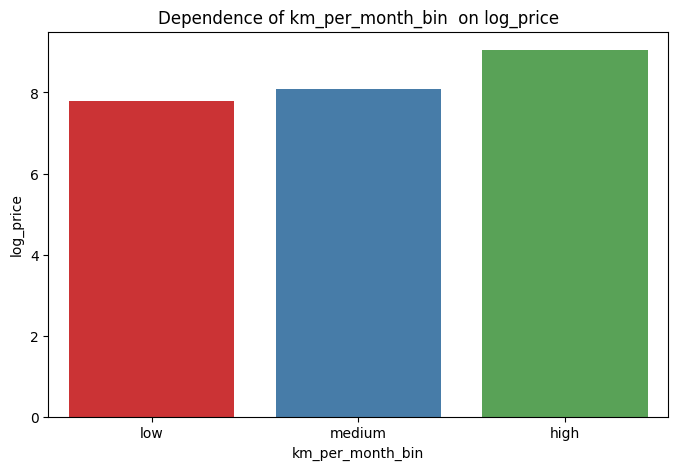

In [9]:
df_train["km_per_month"] = df_train["kilometer"] / data["autoAgeMonths"]
df_train["km_per_month"] = df_train.groupby("autoAgeMonths")["km_per_month"].transform(
    lambda x: x.fillna(x.median())
)
df_train["km_per_month"] = df_train["km_per_month"].fillna(df_train["km_per_month"].median())

bins = [0, 700, 1200, np.inf]
labels = ['low', 'medium', 'high']
df_train['km_per_month_bin'] = pd.cut(df_train['km_per_month'], bins=bins, labels=labels)



kil_pr = df_train.groupby('km_per_month_bin')['log_price'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=kil_pr, x='km_per_month_bin', y='log_price', palette='Set1')
plt.title('Dependence of km_per_month_bin  on log_price')
plt.show()

# powerPS #
1) clip beetween 0 and 250
2) StandardScaler

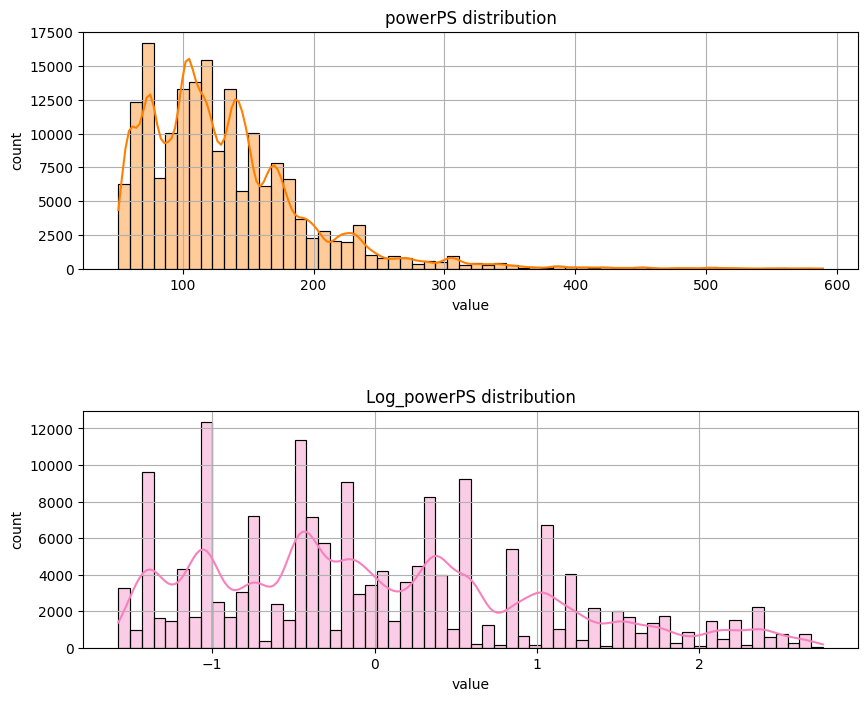

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
fig.subplots_adjust(hspace=0.6)


#powerPS
sns.histplot(data=df_train, x='powerPS', kde=True ,bins=60, alpha=0.4, color = sns.color_palette('Set1')[4], ax=ax[0])
ax[0].set_ylabel('count')
ax[0].set_xlabel('value')
ax[0].grid(True)
ax[0].set_title('powerPS distribution')

#Log_powerPS
df_train['powerPS'] = df_train['powerPS'].where(df_train['powerPS'] <250)
powerPS_scaled = scaler.fit_transform((df_train[['powerPS']]))
sns.histplot(powerPS_scaled.ravel(), color = sns.color_palette('Set1')[7], alpha=0.4, kde=True ,bins=60, ax=ax[1])
ax[1].set_ylabel('count')
ax[1].set_xlabel('value')
ax[1].grid(True)
ax[1].set_title('Log_powerPS distribution')

plt.show()

# autoAgeMonths #
1) clip beetween 0 and 280
2) StandardScaler

Text(0.5, 1.0, 'scaled_autoAgeMonths distribution')

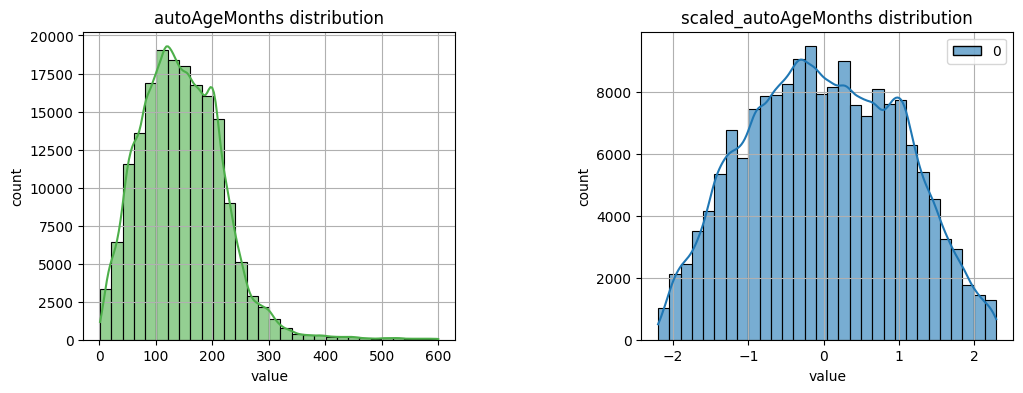

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
fig.subplots_adjust(wspace=0.5)

# autoAgeMonths
sns.histplot(df_train['autoAgeMonths'], kde=True ,bins=30, alpha=0.6, color=sns.color_palette('Set1')[2], ax=ax[0])
ax[0].set_ylabel('count')
ax[0].set_xlabel('value')
ax[0].grid(True)
ax[0].set_title('autoAgeMonths distribution')

#scaled_autoAgeMonths
df_train['autoAgeMonths'] = df_train['autoAgeMonths'].where(df_train['autoAgeMonths'] <= 280)
age_scaled = scaler.fit_transform(df_train[['autoAgeMonths']])

sns.histplot(age_scaled, kde=True ,bins=30, alpha=0.6, color=sns.color_palette('Set1')[1], ax=ax[1])
ax[1].set_ylabel('count')
ax[1].set_xlabel('value')
ax[1].grid(True)
ax[1].set_title('scaled_autoAgeMonths distribution')


# Type of brand/model


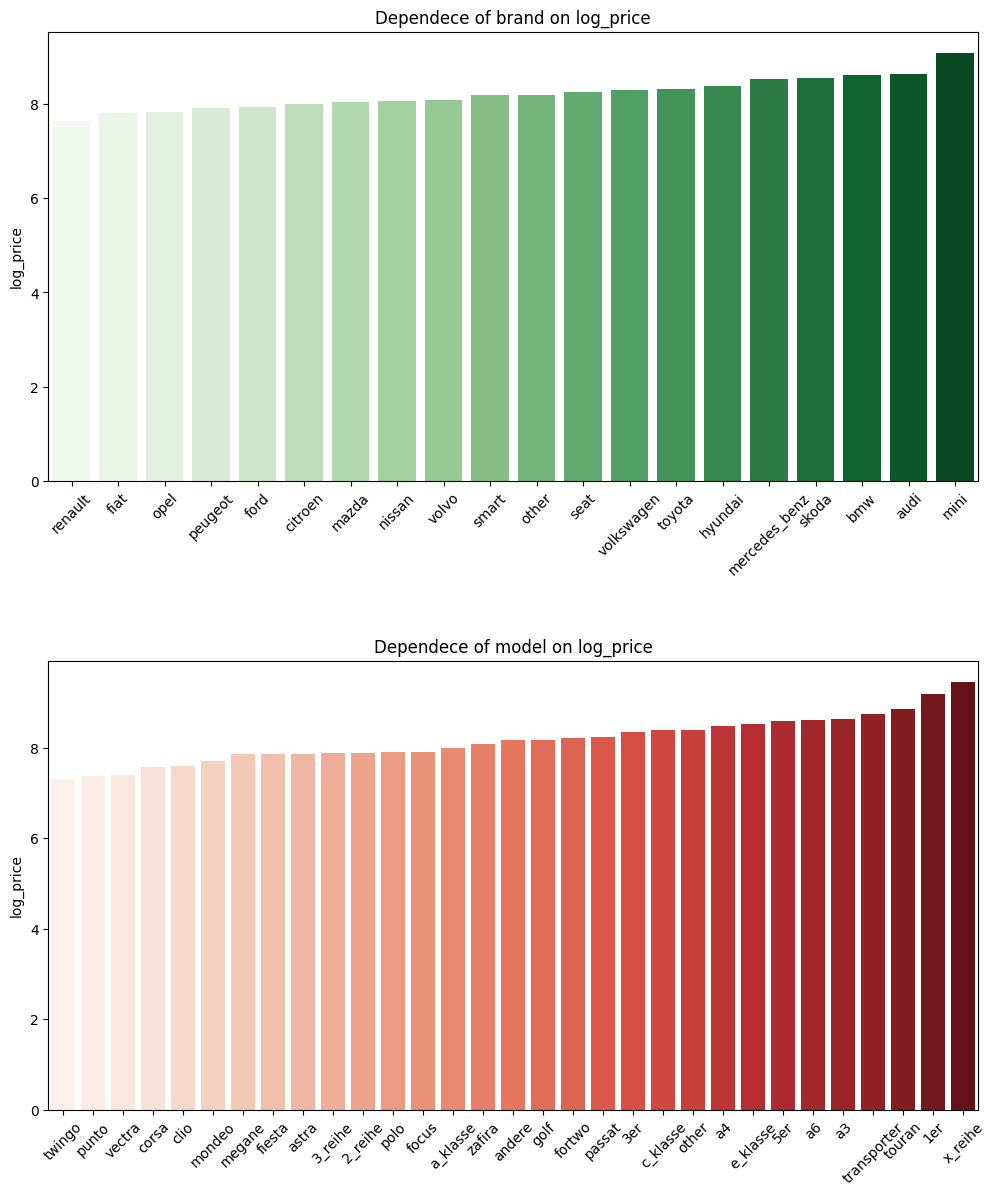

In [12]:
brand_values = df_train['brand'].value_counts(normalize=True)
other_brands = brand_values[brand_values < 0.01].index
df_b = df_train.copy()


df_b['brand'] = df_b['brand'].where(~df_b['brand'].isin(other_brands), 'other')
top_models = df_b["model"].value_counts().nlargest(30).index
df_b["model"] = df_b["model"].where(df_b["model"].isin(top_models), "other")

brand_pr = df_b.groupby('brand')['log_price'].mean().sort_values().reset_index()
model_pr = df_b.groupby('model')['log_price'].mean().sort_values().reset_index()


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,14))
plt.subplots_adjust(hspace=0.4)


sns.barplot(data=brand_pr, x='brand', y='log_price', ax=ax[0], palette='Greens')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('')
ax[0].set_title('Dependece of brand on log_price')

sns.barplot(data=model_pr, x='model', y='log_price', ax=ax[1], palette='Reds')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel('')
ax[1].set_title('Dependece of model on log_price')


plt.show()


# Conclusion about data

Our train sample has 177829 rows. 9 features of which one is price - our target variable. We have 4 numerical features and 5 categorical unordered ones.
### 1) Price.
The distribution of our responses has a strong left skew. This is eliminated by taking the logarithm of the feature. However, we should take into account that we could have used RMSLE as our loss. In fact, using RMSLE directly or taking the logarithm of our target variable, using MSE, and not forgetting to take the exponent of our responses are equivalent things. We will use the second approach because RMSLE cannot be presented as a loss function for most standard regressors. Also, we can experiment with different transformations, unlike RMSLE, where the logarithm is fixed.

**After logarithmic transformation of the target variable, price scales are greatly compressed, so the dependence looks “flat” on the graph.
However, even a small shift on the logarithmic axis corresponds to a large difference in the original prices.
Thus, small changes on the logarithmic graph mean significant relative changes in price.
Therefore, a visually weak relationship in logarithms actually reflects a strong economic effect in the original price scale.**

166257 values are not-null. Others will be filled in with the median.

### 2) Brand.
We have 38 different brand values. That is quite a lot, and many brands do not appear very often in our data.
Therefore, it would be advisable to combine those brands that have a lower percentage in terms of the number of occurrences in the sample into one category called “Others.” Then we will have 20 brands. Based on the dependency graph, we can see that different car brands have different effects on the cost of the car. This means that this attribute is important to us.

All values are not-null.


### 3) Model.
We have 249 different values for the model attribute. 
Of course, this attribute depends on the previous one, because each brand has its own limited set of unique models. We will proceed in the same way as with brands and assign all models that are rarely encountered to the ‘other’ category. Our graph confirms that this attribute contributes to the prediction.

All values are not-null.

### 4) vehicleType.
With the vehicleType, everything is much easier.
We have eight unique values, and from the dependency graph, we can see that each value has a different contribution to the prediction of our target variable, so this feature is also fundamental for us.

All values are not-null.


There were thoughts of creating a new feature by combining these three features, but the number of combinations would be incredibly large. Plus, we will be encoding our categorical features, which will exacerbate the problem even further.

### 5) gearbox, fuelType, notRepairedDamage
In the case of the gearbox and notRepairedDamage, we have two binary features (meaning that they are categorical but only take two values). The graphs showing the dependence of these two features on the target variable make it easy to understand that they are important for building our model, because different values in these two features lead to different price values. For example, automatic transmissions increase the price of a car on average. A ‘yes’ value for notRepairedDamage also significantly increases the price of a car.

A similar situation is observed with the type of fuel. For example, if a car has a hybrid engine, its price is on average significantly higher than that of a car with an engine running on liquefied petroleum gas.

All values are not-null.

### 6) powerPS
powerPS has such a  Multimodal Distribution. The graph shows that there are no pronounced extremes or peaks. There are also no skewed values to the left or right. We cut off values above 260 because they are quite rare and do not carry any generalizing value. On the contrary, they can interfere with the model, and it will extract unnecessary noise from this data. Conventional normalization is also used. The correlation matrix indicates that this feature is also important to us.

157,520 values are not-nan. Therefore, we will also have to fill in the nan data. They account for approximately 12 percent, so without losing much accuracy, they can be filled in with the median.

### 7) autoAgeMonths   
We truncate the autoAgeMonths values to 280 because values above this number are quite rare and do not describe the average situation. They are more local in nature. After that, we can see that we have a fairly symmetrical distribution. The correlation matrix indicates that this feature is also important to us.

There are 170,173 non-null values. The rest will be filled with the median.

### 8) kilometer

This feature is quite problematic. First, it is less important in linear dependence on the target variable, which is confirmed by the correlation matrix. Also, its distribution is quite ‘stepped’.
The kilometer feature contains a large number of missing values and has a limited range of values. To increase its informativeness, I converted it into a new feature, km_per_month = kilometer / autoAgeMonths, which reflects the intensity of car use. To stabilize the impact on the target variable, binning was performed into three categories:

low (<700 km/month) — little-used car

medium (700–1200 km/month) — average intensity of use

high (>1200 km/month) — actively used car 

# Pipeline

In [13]:

# Loading data
df = pd.read_csv('autos.csv').drop_duplicates()

df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)
val_size = 0.1 / 0.9
df_train, df_val = train_test_split(df_train, test_size=val_size, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


# ClipTransformer
class ClipTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, min_val=None, max_val=None):
        self.min_val = min_val
        self.max_val = max_val
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.clip(X, self.min_val, self.max_val)


# RareGrouper
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.005, rare_label='others'):
        self.threshold = threshold
        self.rare_label = rare_label
        self.value_counts = {}
        self.columns = None
    
    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            X_df = X
            self.columns = X.columns
        else:
            X_df = pd.DataFrame(X, columns=[f'col_{i}' for i in range(X.shape[1])])
            self.columns = X_df.columns

        for col in X_df.columns:
            counts = X_df[col].value_counts(normalize=True)
            self.value_counts[col] = counts[counts >= self.threshold].index.tolist()
        return self
    
    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            X_df = X.copy()
        else:
            X_df = pd.DataFrame(X, columns=self.columns)
        
        for col in X_df.columns:
            X_df[col] = X_df[col].apply(lambda v: v if v in self.value_counts[col] else self.rare_label)
        return X_df.values

# Function for km_per_month
def add_km_per_month(df):
    df = df.copy()
    df['autoAgeMonths'] = df['autoAgeMonths'].fillna(df['autoAgeMonths'].median()).clip(lower=1)
    df["km_per_month"] = df["kilometer"] / df["autoAgeMonths"]
    df["km_per_month"] = df["km_per_month"].clip(0, 5000)  # Обмеження km_per_month
    df["km_per_month"] = df.groupby("autoAgeMonths")["km_per_month"].transform(lambda x: x.fillna(x.median()))
    df["km_per_month"] = df["km_per_month"].fillna(df["km_per_month"].median())
    
    bins = [0, 700, 1200, np.inf]
    labels = ['low', 'medium', 'high']
    df['km_per_month_bin'] = pd.cut(df['km_per_month'], bins=bins, labels=labels)
    df['km_per_month_bin'] = df['km_per_month_bin'].cat.add_categories('missing').fillna('missing')
    return df

# Features
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'km_per_month_bin']
numeric = ['powerPS', 'autoAgeMonths']


# ColumnTransformer
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('rare_grouper', RareGrouper(threshold=0.005)),  # Зменшено threshold
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

power_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('clip', ClipTransformer(min_val=0, max_val=260)),
    ('scaler', StandardScaler())
])

age_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('clip', ClipTransformer(min_val=0, max_val=280)),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('power', power_pipe, ['powerPS']),
    ('age', age_pipe, ['autoAgeMonths'])
])

# Full pipeline
pipeline = Pipeline([
    ('km_pipeline', FunctionTransformer(add_km_per_month, validate=False)),
    ('preprocessing', preprocessor)
])

# Price
price_min, price_max = 450, 25000
median_price = df_train['price'].median()

class PriceScaler:
    def __init__(self, log_transform=True):
        self.log_transform = log_transform
        self.scaler = StandardScaler()
        self.median_price = None
    
    def fit(self, y, df_train=None):
        self.median_price = df_train['price'].median()
        y = pd.Series(y).clip(price_min, price_max).fillna(self.median_price).values
        if self.log_transform:
            y = np.log1p(y)
        self.scaler.fit(y.reshape(-1, 1))
        return self
    
    def transform(self, y, df=None):
        y = pd.Series(y).clip(price_min, price_max).fillna(self.median_price).values
        if self.log_transform:
            y = np.log1p(y)
        return self.scaler.transform(y.reshape(-1, 1)).ravel()
    
    def inverse_transform(self, y):
        y = self.scaler.inverse_transform(y.reshape(-1, 1)).ravel()
        if self.log_transform:
            y = np.expm1(y)
        return y

# Pipeline without price
price_scaler_mse = PriceScaler(log_transform=True)  # MSE (with log)
price_scaler_logcosh = PriceScaler(log_transform=False)  # Log-Cosh (without log)

# Processing the target variable
y_train_mse = price_scaler_mse.fit(df_train['price'], df_train).transform(df_train['price'])
y_val_mse = price_scaler_mse.transform(df_val['price'], df_val)
y_test_mse = price_scaler_mse.transform(df_test['price'], df_test)

y_train_logcosh = price_scaler_logcosh.fit(df_train['price'], df_train).transform(df_train['price'])
y_val_logcosh = price_scaler_logcosh.transform(df_val['price'], df_val)
y_test_logcosh = price_scaler_logcosh.transform(df_test['price'], df_test)


# X
for df_ in [df_train, df_val, df_test]:
    df_[numeric] = df_[numeric].astype(float)

X_train_transformed = pipeline.fit_transform(df_train)
X_val_transformed = pipeline.transform(df_val)
X_test_transformed = pipeline.transform(df_test)


#  bias

def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return hstack([X, csr_matrix(bias)])

X_train_final = add_bias(X_train_transformed)
X_val_final = add_bias(X_val_transformed)
X_test_final = add_bias(X_test_transformed)

# Сheck

def check_sparse_data(X, name):
    nan_count = np.isnan(X.data).sum() if X.data.size > 0 else 0
    inf_count = np.isinf(X.data).sum() if X.data.size > 0 else 0
    print(f"{name}: NaN = {nan_count}, Inf = {inf_count}, Shape = {X.shape}")

check_sparse_data(X_train_final, "X_train")
check_sparse_data(X_val_final, "X_val")
check_sparse_data(X_test_final, "X_test")

print(f"y_train_mse: NaN = {np.isnan(y_train_mse).sum()}, Inf = {np.isinf(y_train_mse).sum()}")
print(f"y_val_mse: NaN = {np.isnan(y_val_mse).sum()}, Inf = {np.isinf(y_val_mse).sum()}")
print(f"y_test_mse: NaN = {np.isnan(y_test_mse).sum()}, Inf = {np.isinf(y_test_mse).sum()}")
print(f"y_train_logcosh: NaN = {np.isnan(y_train_logcosh).sum()}, Inf = {np.isinf(y_train_logcosh).sum()}")
print(f"y_val_logcosh: NaN = {np.isnan(y_val_logcosh).sum()}, Inf = {np.isinf(y_val_logcosh).sum()}")
print(f"y_test_logcosh: NaN = {np.isnan(y_test_logcosh).sum()}, Inf = {np.isinf(y_test_logcosh).sum()}")

X_train: NaN = 0, Inf = 0, Shape = (177829, 86)
X_val: NaN = 0, Inf = 0, Shape = (22229, 86)
X_test: NaN = 0, Inf = 0, Shape = (22229, 86)
y_train_mse: NaN = 0, Inf = 0
y_val_mse: NaN = 0, Inf = 0
y_test_mse: NaN = 0, Inf = 0
y_train_logcosh: NaN = 0, Inf = 0
y_val_logcosh: NaN = 0, Inf = 0
y_test_logcosh: NaN = 0, Inf = 0


# Model fitting

In [14]:
# Hyperparameters
TOLERANCE = 1e-6
MAX_ITER = 2000

# Check for numerical issues (NaN/Inf)
def check_for_numerical_issues(arr, name="array", raise_error=True):
    """Check array for NaN or Inf values."""
    data = arr.data if issparse(arr) else arr.ravel()
    nan_count, inf_count = np.isnan(data).sum(), np.isinf(data).sum()
    print(f"{name} - NaN: {nan_count}, Inf: {inf_count}")
    if raise_error and (nan_count > 0 or inf_count > 0):
        raise ValueError(f"{name} contains {nan_count} NaN and {inf_count} Inf values")
    return nan_count == 0 and inf_count == 0

# ClipTransformer for limiting feature values
class ClipTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, min_val=None, max_val=None):
        self.min_val = min_val
        self.max_val = max_val
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.clip(X, self.min_val, self.max_val)

# RareGrouper for grouping rare categories
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.005, rare_label='others'):
        self.threshold = threshold
        self.rare_label = rare_label
        self.value_counts = {}
        self.columns = None
    
    def fit(self, X, y=None):
        X_df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X, columns=[f'col_{i}' for i in range(X.shape[1])])
        self.columns = X_df.columns
        for col in X_df.columns:
            counts = X_df[col].value_counts(normalize=True)
            self.value_counts[col] = counts[counts >= self.threshold].index.tolist()
        return self
    
    def transform(self, X):
        X_df = X.copy() if isinstance(X, pd.DataFrame) else pd.DataFrame(X, columns=self.columns)
        for col in X_df.columns:
            X_df[col] = X_df[col].apply(lambda v: v if v in self.value_counts[col] else self.rare_label)
        return X_df.values

# Add km_per_month feature
def add_km_per_month(df):
    """Calculate km_per_month and bin it."""
    df = df.copy()
    df['autoAgeMonths'] = df['autoAgeMonths'].fillna(df['autoAgeMonths'].median()).clip(lower=1)
    df["km_per_month"] = df["kilometer"] / df["autoAgeMonths"]
    df["km_per_month"] = df["km_per_month"].clip(0, 5000)
    df["km_per_month"] = df.groupby("autoAgeMonths")["km_per_month"].transform(lambda x: x.fillna(x.median()))
    df["km_per_month"] = df["km_per_month"].fillna(df["km_per_month"].median())
    bins = [0, 700, 1200, np.inf]
    labels = ['low', 'medium', 'high']
    df['km_per_month_bin'] = pd.cut(df['km_per_month'], bins=bins, labels=labels)
    df['km_per_month_bin'] = df['km_per_month_bin'].cat.add_categories('missing').fillna('missing')
    return df

# Define features
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'km_per_month_bin']
numeric = ['powerPS', 'autoAgeMonths']

# Preprocessing pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('rare_grouper', RareGrouper(threshold=0.005)),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

power_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('clip', ClipTransformer(min_val=0, max_val=260)),
    ('scaler', StandardScaler())
])

age_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('clip', ClipTransformer(min_val=0, max_val=280)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('power', power_pipe, ['powerPS']),
    ('age', age_pipe, ['autoAgeMonths'])
])

pipeline = Pipeline([
    ('km_pipeline', FunctionTransformer(add_km_per_month, validate=False)),
    ('preprocessing', preprocessor)
])

# PriceScaler for target variable
class PriceScaler:
    def __init__(self, log_transform=True):
        self.log_transform = log_transform
        self.scaler = StandardScaler()
        self.median_price = None
    
    def fit(self, y, df_train=None):
        self.median_price = df_train['price'].median()
        y = pd.Series(y).clip(450, 25000).fillna(self.median_price).values
        if self.log_transform:
            y = np.log1p(y)
        self.scaler.fit(y.reshape(-1, 1))
        return self
    
    def transform(self, y, df=None):
        y = pd.Series(y).clip(450, 25000).fillna(self.median_price).values
        if self.log_transform:
            y = np.log1p(y)
        return self.scaler.transform(y.reshape(-1, 1)).ravel()
    
    def inverse_transform(self, y):
        y = self.scaler.inverse_transform(y.reshape(-1, 1)).ravel()
        if self.log_transform:
            y = np.expm1(y)
        return y

# Load and split data
df = pd.read_csv('autos.csv').drop_duplicates()
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.1/0.9, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Process target variable
price_scaler_mse = PriceScaler(log_transform=True)
price_scaler_logcosh = PriceScaler(log_transform=False)

y_train_mse = price_scaler_mse.fit(df_train['price'], df_train).transform(df_train['price'])
y_val_mse = price_scaler_mse.transform(df_val['price'], df_val)
y_test_mse = price_scaler_mse.transform(df_test['price'], df_test)

y_train_logcosh = price_scaler_logcosh.fit(df_train['price'], df_train).transform(df_train['price'])
y_val_logcosh = price_scaler_logcosh.transform(df_val['price'], df_val)
y_test_logcosh = price_scaler_logcosh.transform(df_test['price'], df_test)

# Prepare features
for df_ in [df_train, df_val, df_test]:
    df_[numeric] = df_[numeric].astype(float)

X_train_transformed = pipeline.fit_transform(df_train)
X_val_transformed = pipeline.transform(df_val)
X_test_transformed = pipeline.transform(df_test)

def add_bias(X):
    """Add bias term to feature matrix."""
    bias = np.ones((X.shape[0], 1))
    return hstack([X, csr_matrix(bias)])

X_train_final = add_bias(X_train_transformed)
X_val_final = add_bias(X_val_transformed)
X_test_final = add_bias(X_test_transformed)

# Verify data quality
print("=== Data Quality Check ===")
for name, data in [("X_train", X_train_final), ("y_train_mse", y_train_mse), ("y_train_logcosh", y_train_logcosh),
                   ("X_val", X_val_final), ("y_val_mse", y_val_mse), ("y_val_logcosh", y_val_logcosh),
                   ("X_test", X_test_final), ("y_test_mse", y_test_mse), ("y_test_logcosh", y_test_logcosh)]:
    check_for_numerical_issues(data, name, raise_error=True)

# Train models and collect results
all_results = []
methods = ["full", "stochastic", "momentum", "adam"]
lambdas = [1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 0.01, 0.1]
mu = 0.01

# Learning rate tuning
print("\n=== Learning Rate Tuning ===")
for method in methods:
    print(f"\n--- Training {method.upper()} ---")
    for lam in lambdas:
        descent_config = {"descent_name": method, "kwargs": {"dimension": X_train_final.shape[1], "lambda_": lam}}
        if method == "stochastic":
            descent_config["kwargs"]["batch_size"] = min(64, X_train_final.shape[0] // 4)
        
        try:
            model = LinearRegression(descent_config, tolerance=TOLERANCE, max_iter=MAX_ITER)
            model.fit(X_train_final, y_train_mse)
            y_val_pred = model.predict(X_val_final)
            
            if np.isnan(y_val_pred).any() or np.isinf(y_val_pred).any():
                print(f"Skipping λ={lam}: Invalid predictions")
                all_results.append({
                    "method": method, "lambda_": lam, "batch_size": descent_config["kwargs"].get("batch_size", None),
                    "mu": 0, "loss_function": "MSE", "val_loss": np.nan, "test_r2": np.nan, "test_mse": np.nan, "iterations": 0
                })
                continue
            
            val_loss = mean_squared_error(y_val_mse, y_val_pred)
            y_test_pred = model.predict(X_test_final)
            test_r2 = r2_score(y_test_mse, y_test_pred)
            test_mse = mean_squared_error(y_test_mse, y_test_pred)
            iterations = len(model.loss_history) - 1

            all_results.append({
                "method": method, "lambda_": lam, "batch_size": descent_config["kwargs"].get("batch_size", None),
                "mu": 0, "loss_function": "MSE", "val_loss": val_loss, "test_r2": test_r2, "test_mse": test_mse, "iterations": iterations
            })
        except Exception as e:
            print(f"Error for λ={lam}: {e}")
            all_results.append({
                "method": method, "lambda_": lam, "batch_size": descent_config["kwargs"].get("batch_size", None),
                "mu": 0, "loss_function": "MSE", "val_loss": np.nan, "test_r2": np.nan, "test_mse": np.nan, "iterations": 0
            })

# L2 Regularization
print("\n=== L2 Regularization ===")
for lambda_ in [0.0001, 0.001, 0.01, 0.1, 1]:
    for method in methods:
        kwargs = {"dimension": X_train_final.shape[1], "lambda_": lambda_}
        if method == "stochastic":
            kwargs["batch_size"] = 32

        descent_config_reg = {"descent_name": method, "regularized": True, "kwargs": {**kwargs, "mu": mu}}
        descent_config_no_reg = {"descent_name": method, "regularized": False, "kwargs": kwargs}

        try:
            model_no_reg = LinearRegression(descent_config_no_reg, tolerance=TOLERANCE, max_iter=MAX_ITER)
            model_reg = LinearRegression(descent_config_reg, tolerance=TOLERANCE, max_iter=MAX_ITER)
            model_no_reg.fit(X_train_final, y_train_mse)
            model_reg.fit(X_train_final, y_train_mse)

            y_val_pred_no_reg = model_no_reg.predict(X_val_final)
            y_val_pred_reg = model_reg.predict(X_val_final)

            if np.isnan(y_val_pred_no_reg).any() or np.isinf(y_val_pred_no_reg).any() or \
               np.isnan(y_val_pred_reg).any() or np.isinf(y_val_pred_reg).any():
                print(f"Skipping {method}, λ={lambda_}: Invalid predictions")
                all_results.append({
                    "method": method, "lambda_": lambda_, "batch_size": kwargs.get("batch_size", None),
                    "mu": mu, "loss_function": "MSE", "val_loss": np.nan, "test_r2": np.nan, "test_mse": np.nan, "iterations": 0
                })
                continue

            val_loss_no_reg = mean_squared_error(y_val_mse, y_val_pred_no_reg)
            val_loss_reg = mean_squared_error(y_val_mse, y_val_pred_reg)
            y_test_pred_no_reg = model_no_reg.predict(X_test_final)
            y_test_pred_reg = model_reg.predict(X_test_final)

            all_results.append({
                "method": method, "lambda_": lambda_, "batch_size": kwargs.get("batch_size", None),
                "mu": 0, "loss_function": "MSE", "val_loss": val_loss_no_reg,
                "test_r2": r2_score(y_test_mse, y_test_pred_no_reg), "test_mse": mean_squared_error(y_test_mse, y_test_pred_no_reg),
                "iterations": len(model_no_reg.loss_history) - 1
            })
            all_results.append({
                "method": method, "lambda_": lambda_, "batch_size": kwargs.get("batch_size", None),
                "mu": mu, "loss_function": "MSE", "val_loss": val_loss_reg,
                "test_r2": r2_score(y_test_mse, y_test_pred_reg), "test_mse": mean_squared_error(y_test_mse, y_test_pred_reg),
                "iterations": len(model_reg.loss_history) - 1
            })
        except Exception as e:
            print(f"Error for {method}, λ={lambda_}: {e}")
            all_results.append({
                "method": method, "lambda_": lambda_, "batch_size": kwargs.get("batch_size", None),
                "mu": mu, "loss_function": "MSE", "val_loss": np.nan, "test_r2": np.nan, "test_mse": np.nan, "iterations": 0
            })

# Log-Cosh Loss
print("\n=== Log-Cosh Loss ===")
for method in methods:
    descent_config = {"descent_name": method, "kwargs": {"dimension": X_train_final.shape[1], "lambda_": 0.01}}
    if method == "stochastic":
        descent_config["kwargs"]["batch_size"] = 32

    try:
        model = LinearRegression(descent_config, loss_function=LossFunction.LogCosh, tolerance=TOLERANCE, max_iter=MAX_ITER)
        model.fit(X_train_final, y_train_logcosh)
        y_test_pred = model.predict(X_test_final)
        
        if np.isnan(y_test_pred).any() or np.isinf(y_test_pred).any():
            print(f"{method.upper()} - Error: Predictions contain NaN or Inf")
            all_results.append({
                "method": method, "lambda_": 0.01, "batch_size": descent_config["kwargs"].get("batch_size", None),
                "mu": 0, "loss_function": "LogCosh", "val_loss": np.nan, "test_r2": np.nan, "test_mse": np.nan, "iterations": 0
            })
            continue
        
        val_loss = mean_squared_error(y_val_logcosh, model.predict(X_val_final))
        test_r2 = r2_score(y_test_logcosh, y_test_pred)
        test_mse = mean_squared_error(y_test_logcosh, y_test_pred)
        iterations = len(model.loss_history) - 1
        print(f"{method.upper()} - Test R² (Log-Cosh): {test_r2:.4f}, MSE: {test_mse:.6f}, Iterations: {iterations}")

        all_results.append({
            "method": method, "lambda_": 0.01, "batch_size": descent_config["kwargs"].get("batch_size", None),
            "mu": 0, "loss_function": "LogCosh", "val_loss": val_loss, "test_r2": test_r2, "test_mse": test_mse, "iterations": iterations
        })
    except Exception as e:
        print(f"Error for {method}: {e}")
        all_results.append({
            "method": method, "lambda_": 0.01, "batch_size": descent_config["kwargs"].get("batch_size", None),
            "mu": 0, "loss_function": "LogCosh", "val_loss": np.nan, "test_r2": np.nan, "test_mse": np.nan, "iterations": 0
        })

# Final results table
all_results_df = pd.DataFrame(all_results)
all_results_df["batch_size"] = all_results_df["batch_size"].fillna("N/A")
all_results_df = all_results_df[["method", "lambda_", "batch_size", "mu", "loss_function", "val_loss", "test_r2", "test_mse", "iterations"]]
all_results_df.to_csv('all_results.csv', index=False)

print("\n=== Final Results Table ===")
print(all_results_df.to_string(index=False))

=== Data Quality Check ===
X_train - NaN: 0, Inf: 0
y_train_mse - NaN: 0, Inf: 0
y_train_logcosh - NaN: 0, Inf: 0
X_val - NaN: 0, Inf: 0
y_val_mse - NaN: 0, Inf: 0
y_val_logcosh - NaN: 0, Inf: 0
X_test - NaN: 0, Inf: 0
y_test_mse - NaN: 0, Inf: 0
y_test_logcosh - NaN: 0, Inf: 0

=== Learning Rate Tuning ===

--- Training FULL ---

--- Training STOCHASTIC ---

--- Training MOMENTUM ---

--- Training ADAM ---

=== L2 Regularization ===

=== Log-Cosh Loss ===
FULL - Test R² (Log-Cosh): 0.1193, MSE: 0.878285, Iterations: 33
STOCHASTIC - Test R² (Log-Cosh): 0.0944, MSE: 0.903103, Iterations: 28
MOMENTUM - Test R² (Log-Cosh): 0.6422, MSE: 0.356835, Iterations: 129
ADAM - Test R² (Log-Cosh): 0.7086, MSE: 0.290588, Iterations: 695

=== Final Results Table ===
    method  lambda_ batch_size   mu loss_function  val_loss   test_r2  test_mse  iterations
      full 0.000001        N/A 0.00           MSE  0.983236  0.011558  0.985423           1
      full 0.000005        N/A 0.00           MSE  1.0

# Plotting


=== SGD Batch Size Analysis ===


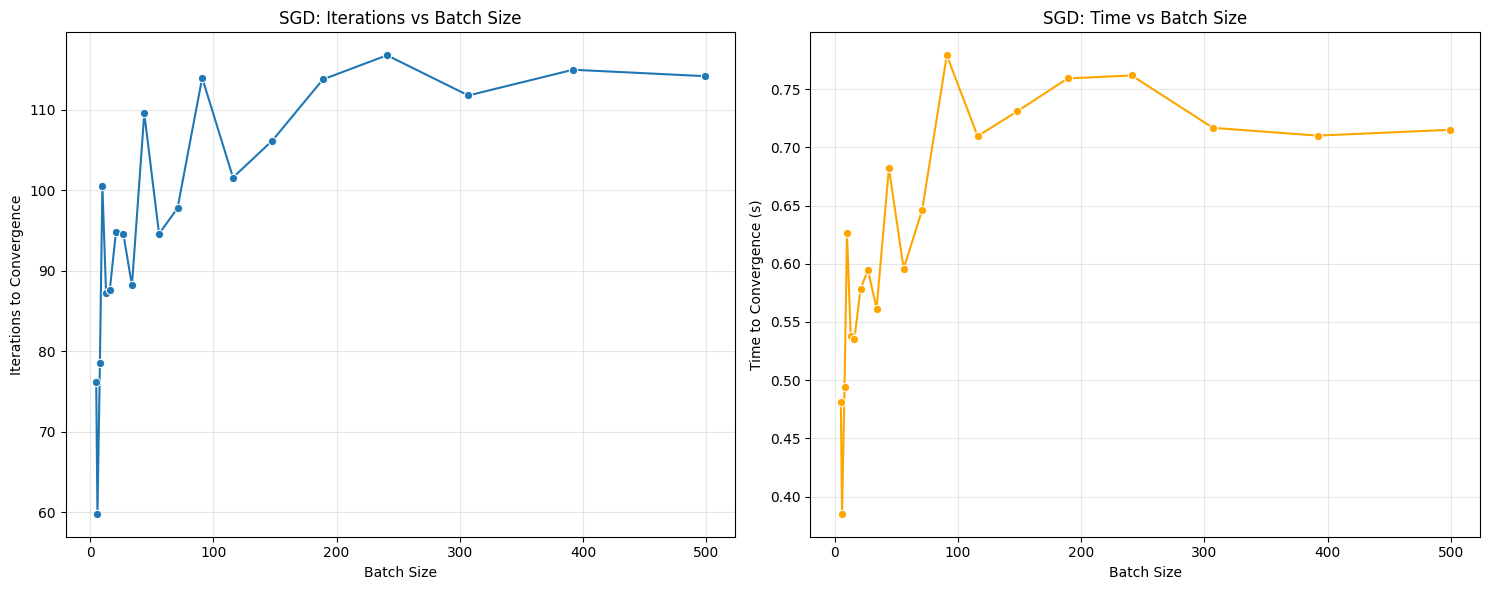

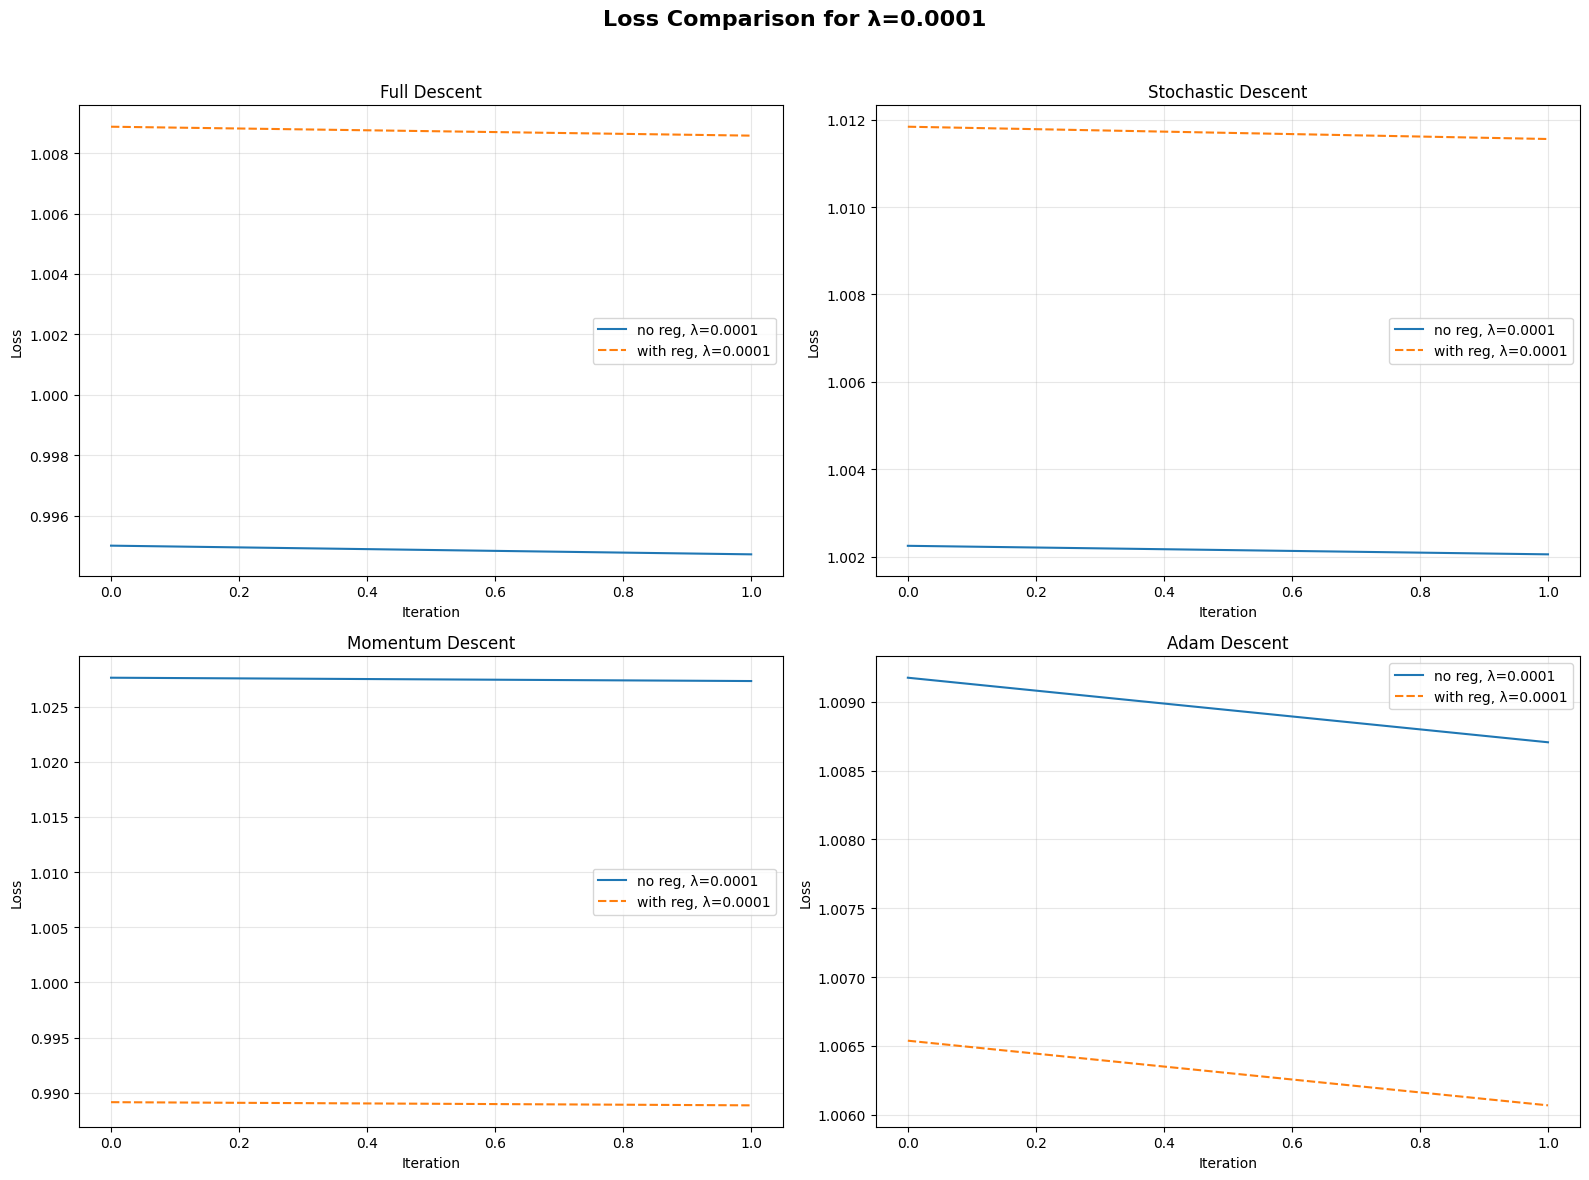

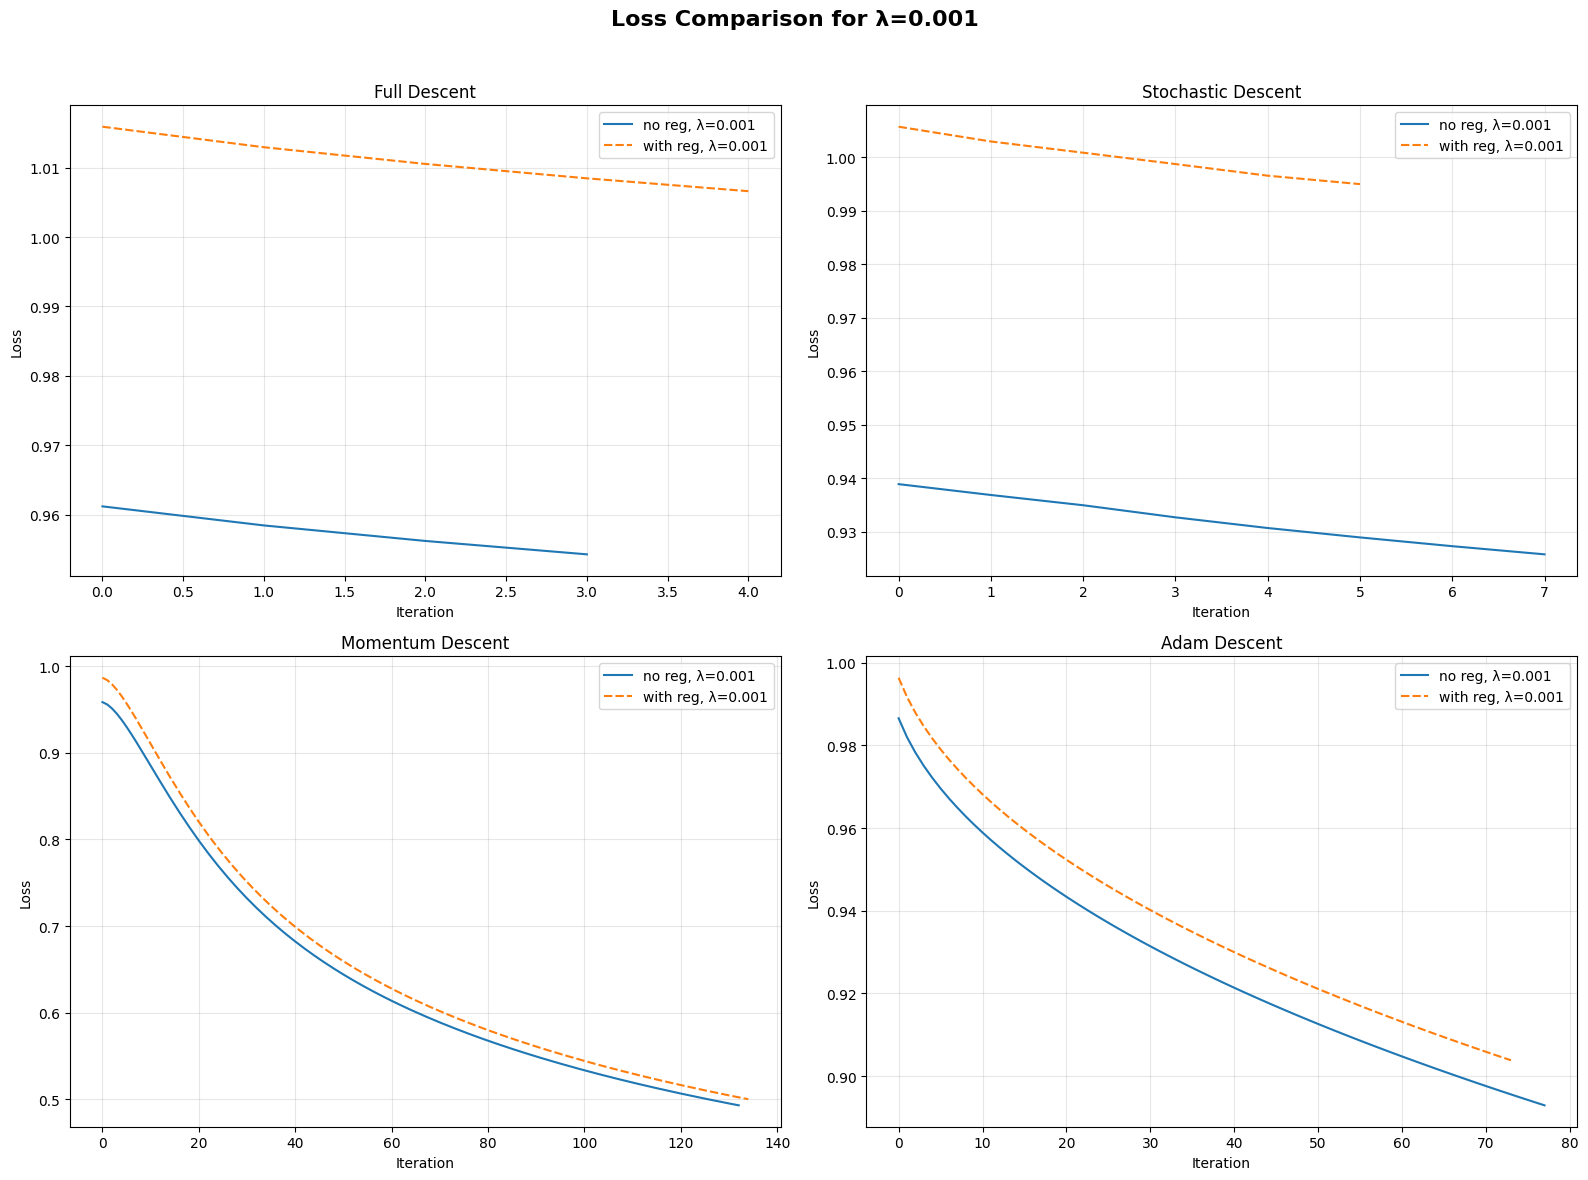

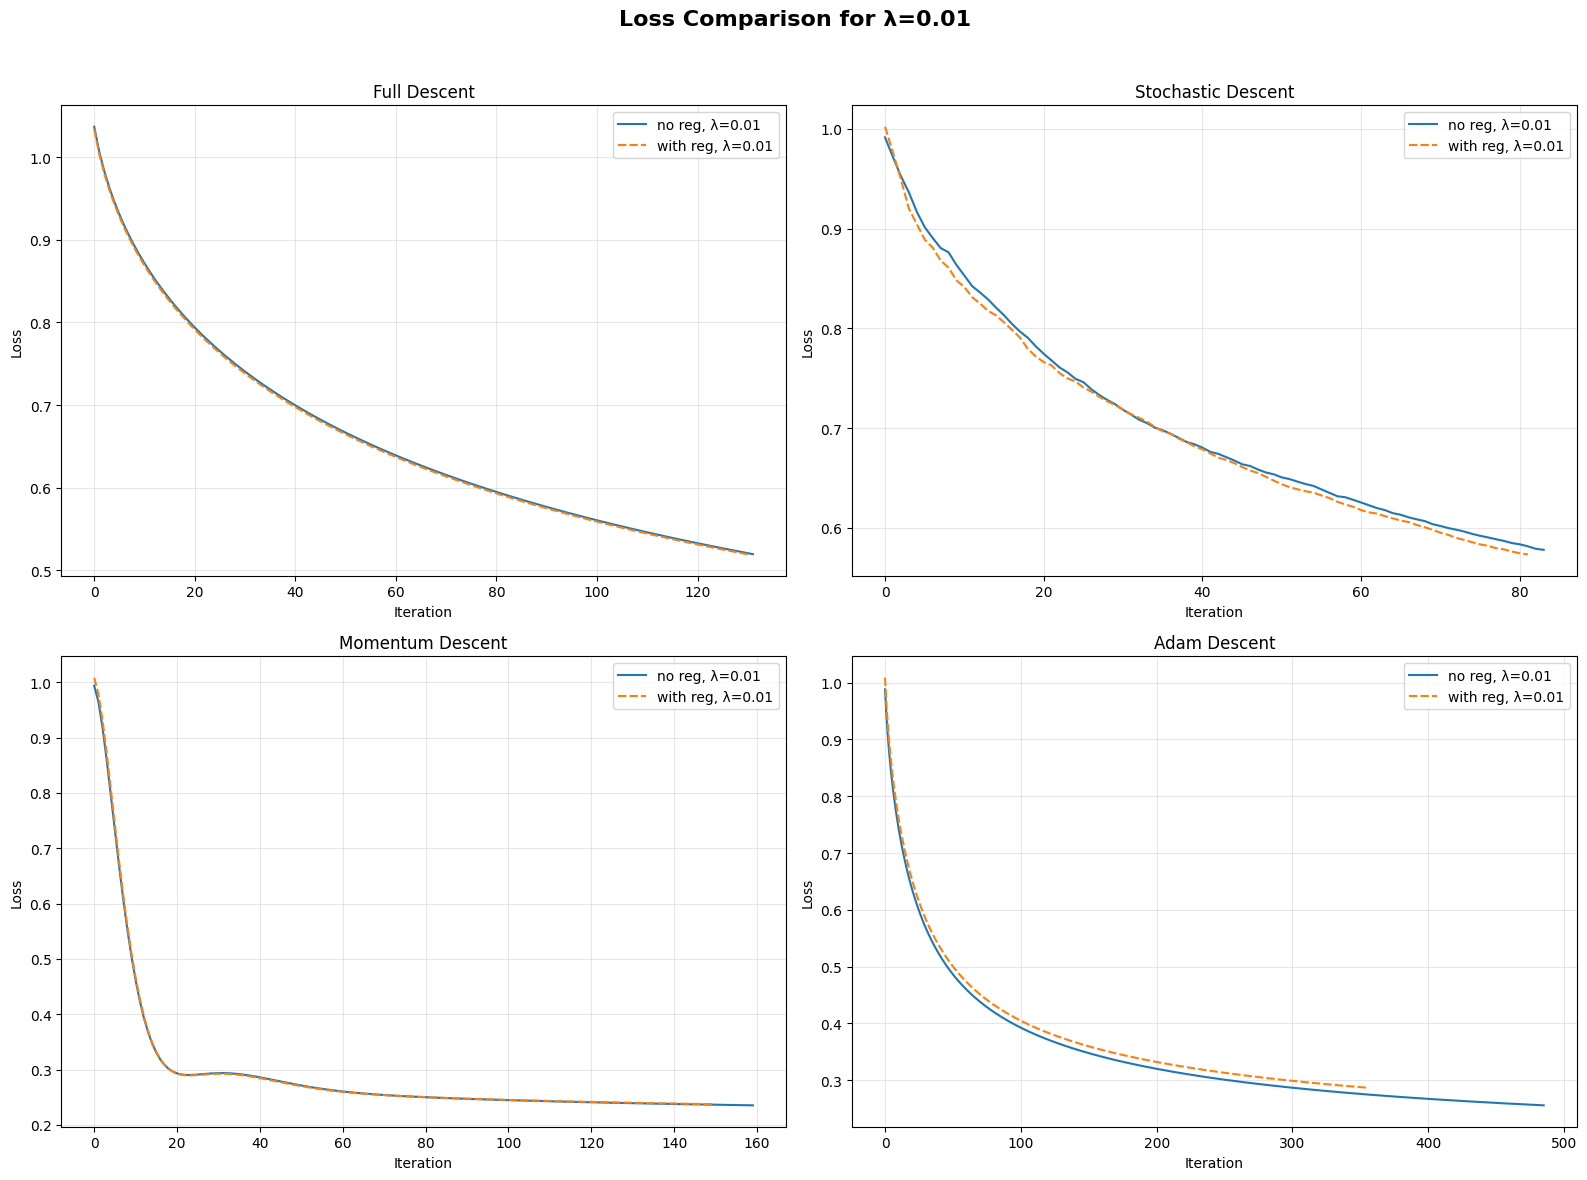

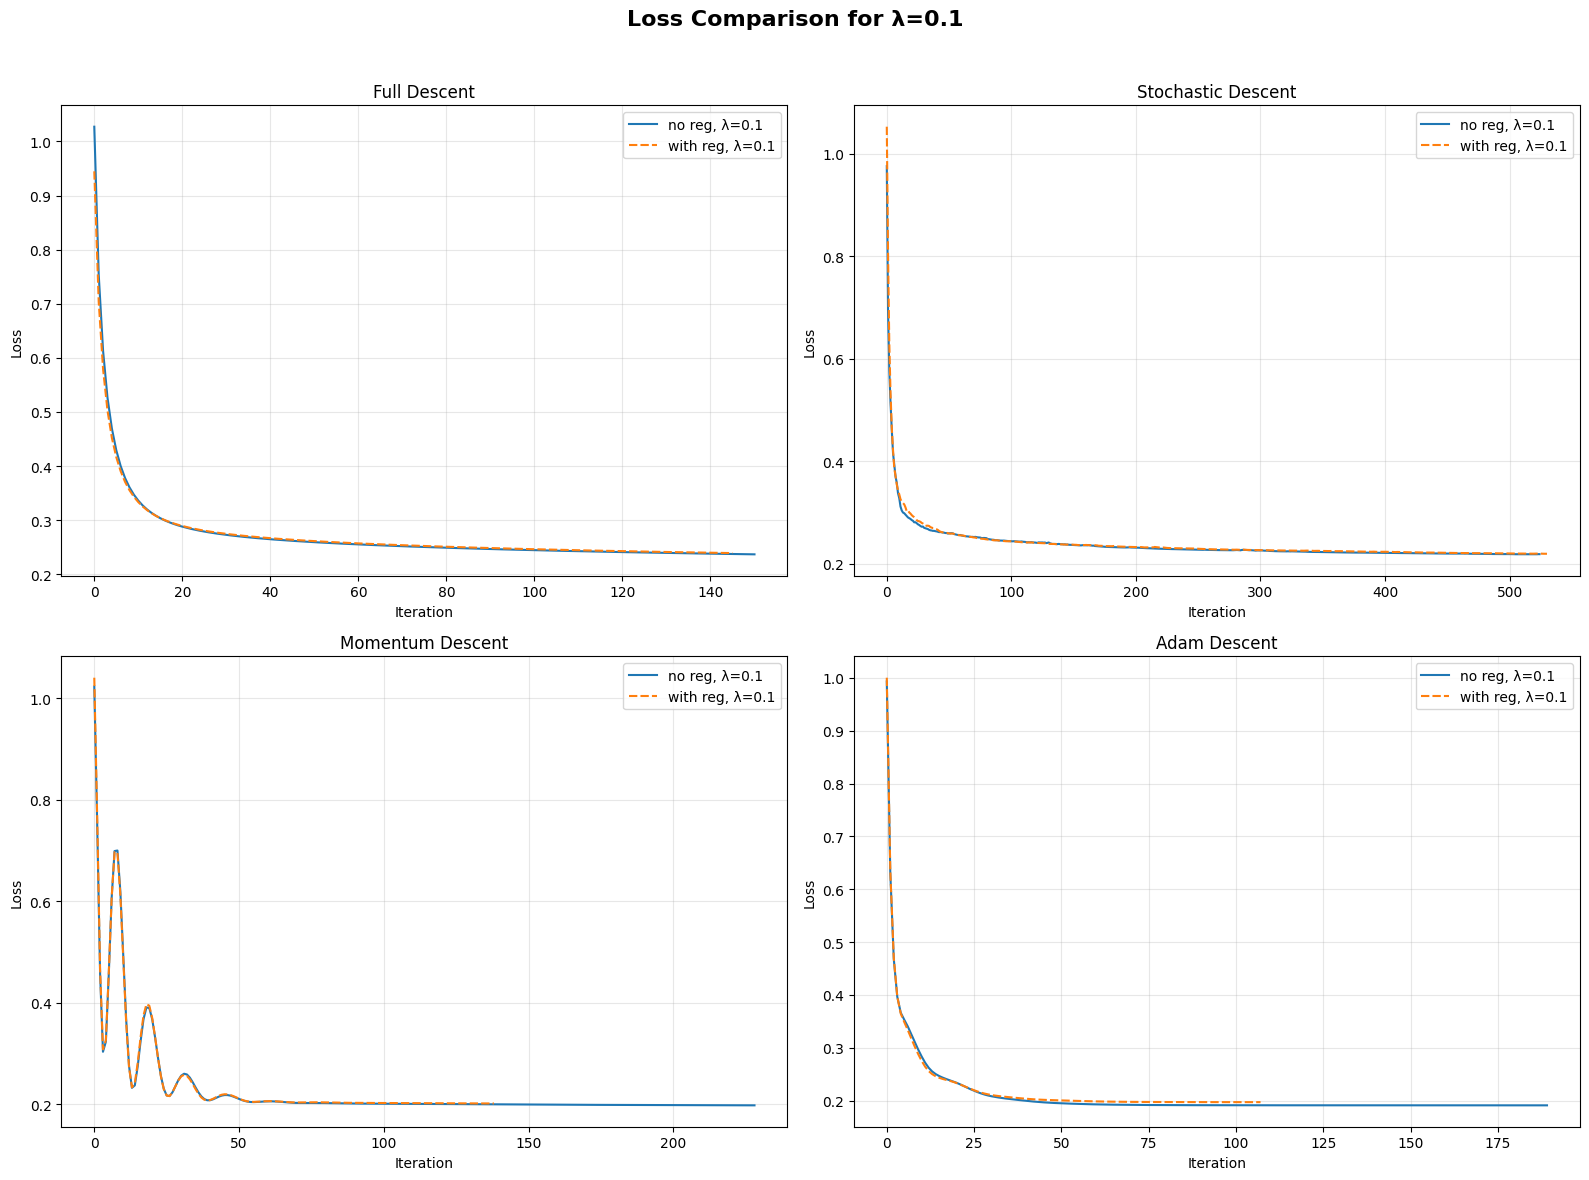

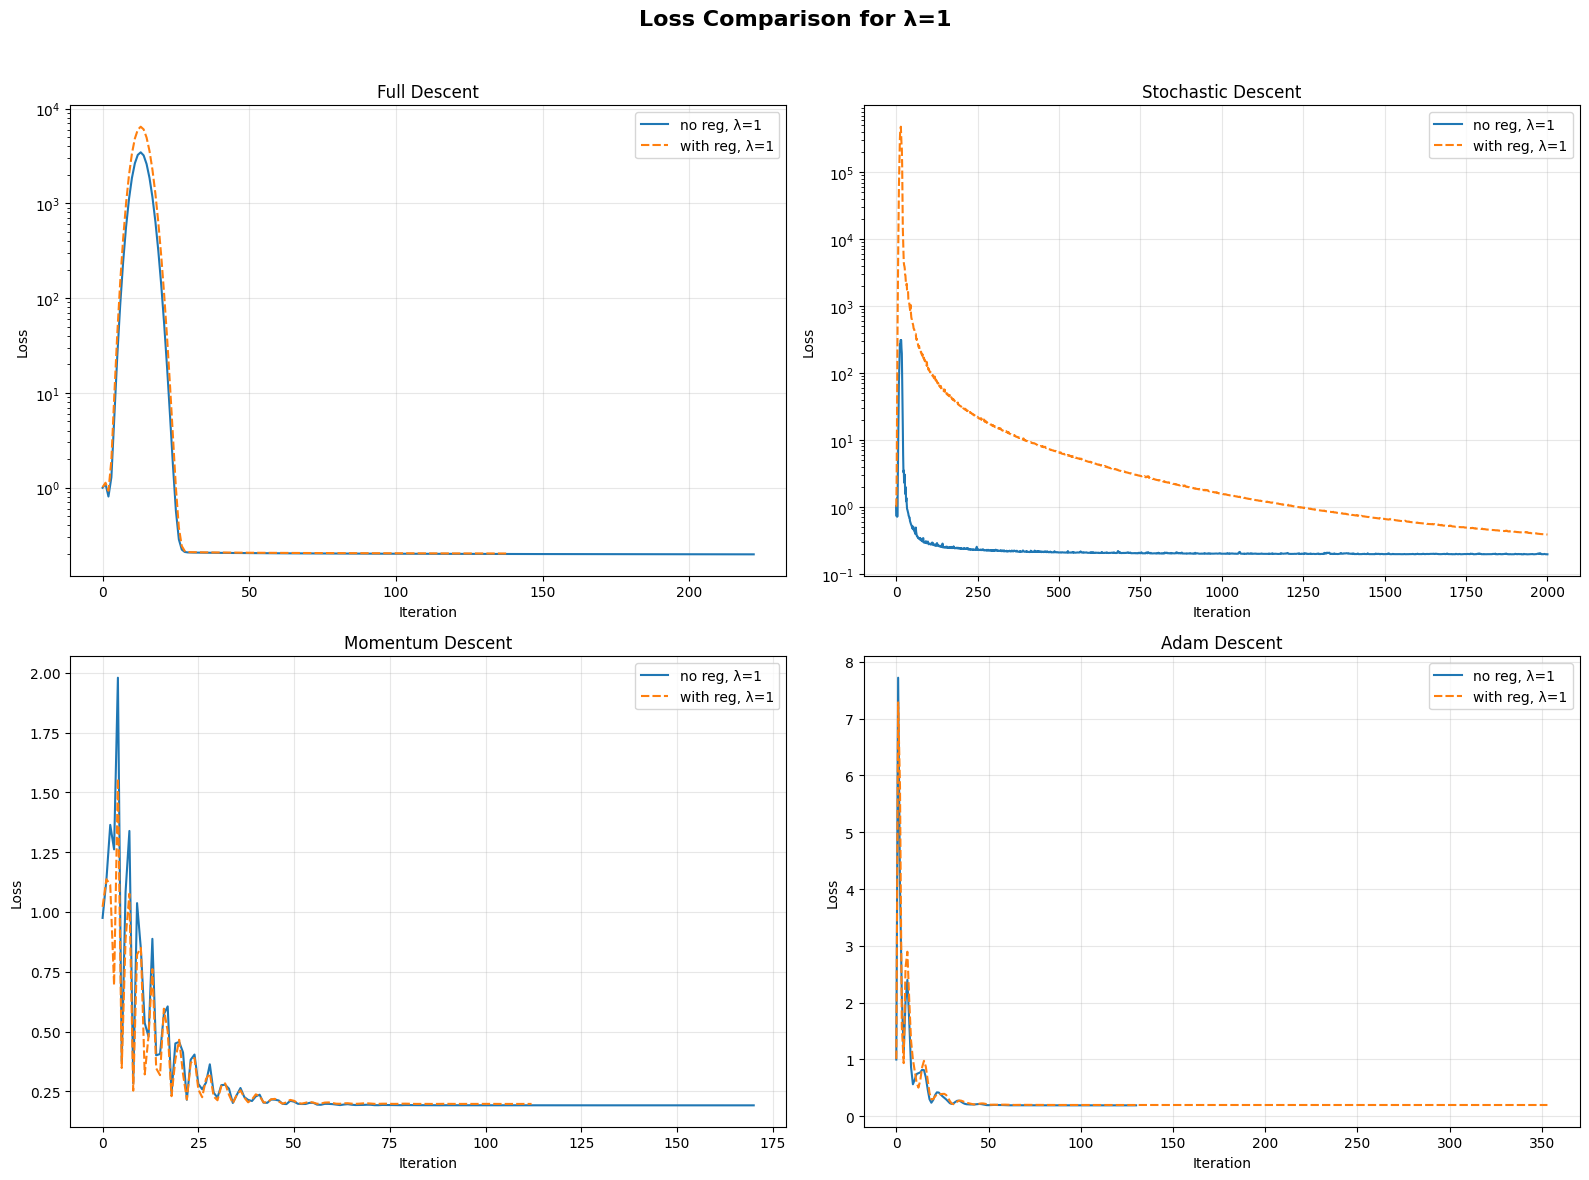

In [15]:
# SGD Batch Size Analysis
batch_sizes = np.unique(np.logspace(np.log10(5), np.log10(min(500, X_train_final.shape[0] // 4)), num=20, dtype=int))
sgd_batch_results = []

print("\n=== SGD Batch Size Analysis ===")
for batch in batch_sizes:
    times = []
    iters = []
    for run in range(5):
        descent_config = {"descent_name": "stochastic", "kwargs": {"dimension": X_train_final.shape[1], "lambda_": 0.01, "batch_size": batch}}
        try:
            model = LinearRegression(descent_config, tolerance=TOLERANCE, max_iter=MAX_ITER)
            start = time.time()
            model.fit(X_train_final, y_train_mse)
            end = time.time()
            y_val_pred = model.predict(X_val_final)
            
            if np.isnan(y_val_pred).any() or np.isinf(y_val_pred).any():
                continue
            
            times.append(end - start)
            iters.append(len(model.loss_history) - 1)
        except Exception as e:
            continue
    
    if times:
        sgd_batch_results.append({"batch": batch, "time": np.mean(times), "iterations": np.mean(iters)})

sgd_batch_df = pd.DataFrame(sgd_batch_results)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graph 1: Iterations vs Batch Size
sns.lineplot(data=sgd_batch_df, x="batch", y="iterations", marker='o', ax=ax1)
ax1.set_xlabel("Batch Size")
ax1.set_ylabel("Iterations to Convergence")
ax1.set_title("SGD: Iterations vs Batch Size")
ax1.grid(True, alpha=0.3)

# # Graph 2: Time vs Batch Size
sns.lineplot(data=sgd_batch_df, x="batch", y="time", marker='o', color='orange', ax=ax2)
ax2.set_xlabel("Batch Size")
ax2.set_ylabel("Time to Convergence (s)")
ax2.set_title("SGD: Time vs Batch Size")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('sgd_batch_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

sgd_batch_df.to_csv('sgd_batch_results.csv', index=False)

# L2 Regularization Plots
for lambda_ in [0.0001, 0.001, 0.01, 0.1, 1]:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    all_loss_data = []
    
    for i, method in enumerate(methods):
        kwargs = {"dimension": X_train_final.shape[1], "lambda_": lambda_}
        if method == "stochastic":
            kwargs["batch_size"] = 32

        descent_config_reg = {"descent_name": method, "regularized": True, "kwargs": {**kwargs, "mu": mu}}
        descent_config_no_reg = {"descent_name": method, "regularized": False, "kwargs": kwargs}

        try:
            model_no_reg = LinearRegression(descent_config_no_reg, tolerance=TOLERANCE, max_iter=MAX_ITER)
            model_reg = LinearRegression(descent_config_reg, tolerance=TOLERANCE, max_iter=MAX_ITER)
            model_no_reg.fit(X_train_final, y_train_mse)
            model_reg.fit(X_train_final, y_train_mse)

            for iteration, loss in enumerate(model_no_reg.loss_history):
                all_loss_data.append({
                    'iteration': iteration,
                    'loss': loss,
                    'method': method,
                    'regularization': f'no reg, λ={lambda_}'
                })
            
            for iteration, loss in enumerate(model_reg.loss_history):
                all_loss_data.append({
                    'iteration': iteration,
                    'loss': loss,
                    'method': method,
                    'regularization': f'with reg, λ={lambda_}'
                })
            
        except Exception as e:
            print(f"Error for {method}, λ={lambda_}: {e}")
    
    loss_df = pd.DataFrame(all_loss_data)
    
    for i, method in enumerate(methods):
        method_data = loss_df[loss_df['method'] == method]
        
        if not method_data.empty:
            sns.lineplot(
                data=method_data, 
                x='iteration', 
                y='loss', 
                hue='regularization',
                style='regularization',
                ax=axes[i],
                palette=['#1f77b4', '#ff7f0e']  # Синий и оранжевый
            )
            
            axes[i].set_xlabel("Iteration")
            axes[i].set_ylabel("Loss")
            axes[i].set_title(f"{method.capitalize()} Descent")
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
            
            # # Set a logarithmic scale for y if the values ​​differ greatly
            if method_data['loss'].max() / method_data['loss'].min() > 100:
                axes[i].set_yscale('log')
    
    plt.suptitle(f"Loss Comparison for λ={lambda_}", fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'l2_regularization_lambda_{lambda_}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Test our models

In [16]:
# Select best models based on val_loss for MSE and Log-Cosh
best_mse = all_results_df[all_results_df["loss_function"] == "MSE"].groupby("method").apply(
    lambda x: x.loc[x["val_loss"].idxmin()] if not x["val_loss"].isna().all() else x.iloc[0]
).reset_index(drop=True)
best_logcosh = all_results_df[all_results_df["loss_function"] == "LogCosh"].groupby("method").apply(
    lambda x: x.loc[x["val_loss"].idxmin()] if not x["val_loss"].isna().all() else x.iloc[0]
).reset_index(drop=True)

# Combine best models
best_models = pd.concat([best_mse, best_logcosh], ignore_index=True)
print("\n=== Best Models for Prediction ===")
print(best_models.to_string(index=False))

# Store predictions
predictions = []

# Make predictions for each best model
for _, row in best_models.iterrows():
    method = row["method"]
    lambda_ = row["lambda_"]
    batch_size = row["batch_size"] if row["batch_size"] != "N/A" else None
    mu = row["mu"]
    loss_function = row["loss_function"]
    
    # Set target variables based on loss function
    y_train = y_train_mse if loss_function == "MSE" else y_train_logcosh
    y_test = y_test_mse if loss_function == "MSE" else y_test_logcosh
    scaler = price_scaler_mse if loss_function == "MSE" else price_scaler_logcosh
    
    # Configure descent
    kwargs = {"dimension": X_train_final.shape[1], "lambda_": lambda_}
    if batch_size:
        kwargs["batch_size"] = int(batch_size)
    descent_config = {
        "descent_name": method,
        "regularized": mu > 0,
        "kwargs": {**kwargs, "mu": mu} if mu > 0 else kwargs
    }
    
    try:
        # Train model
        model = LinearRegression(
            descent_config,
            loss_function=LossFunction.LogCosh if loss_function == "LogCosh" else LossFunction.MSE,
            tolerance=TOLERANCE,
            max_iter=MAX_ITER
        )
        model.fit(X_train_final, y_train)
        
        # Predict on test set
        y_test_pred = model.predict(X_test_final)
        
        if np.isnan(y_test_pred).any() or np.isinf(y_test_pred).any():
            print(f"Error: Predictions for {method} ({loss_function}) contain NaN or Inf")
            continue
        
        # Inverse-transform predictions and actual values to original price scale
        y_test_pred_orig = scaler.inverse_transform(y_test_pred)
        y_test_orig = scaler.inverse_transform(y_test)
        
        # Store predictions
        for actual, predicted in zip(y_test_orig, y_test_pred_orig):
            predictions.append({
                "method": method,
                "loss_function": loss_function,
                "lambda_": lambda_,
                "batch_size": batch_size,
                "mu": mu,
                "actual_price": actual,
                "predicted_price": predicted
            })
        
        # Calculate metrics
        test_r2 = r2_score(y_test, y_test_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        print(f"{method.upper()} ({loss_function}) - Test R²: {test_r2:.4f}, Test MSE: {test_mse:.6f}")
    
    except Exception as e:
        print(f"Error for {method} ({loss_function}): {e}")

# Save predictions to CSV
predictions_df = pd.DataFrame(predictions)
predictions_df.to_csv('test_predictions.csv', index=False)
print("\n=== Test Predictions Saved to 'test_predictions.csv' ===")
print(predictions_df.head().to_string(index=False))


=== Best Models for Prediction ===
    method  lambda_ batch_size  mu loss_function  val_loss  test_r2  test_mse  iterations
      adam     1.00        N/A 0.0           MSE  0.189154 0.802953  0.196445         173
      full     1.00        N/A 0.0           MSE  0.195740 0.795103  0.204272         225
  momentum     1.00        N/A 0.0           MSE  0.189202 0.802823  0.196574         172
stochastic     0.10       32.0 0.0           MSE  0.212883 0.776878  0.222441         752
      adam     0.01        N/A 0.0       LogCosh  0.292613 0.708598  0.290588         695
      full     0.01        N/A 0.0       LogCosh  0.883172 0.119254  0.878285          33
  momentum     0.01        N/A 0.0       LogCosh  0.350588 0.642165  0.356835         129
stochastic     0.01       32.0 0.0       LogCosh  0.909007 0.094367  0.903103          28
ADAM (MSE) - Test R²: 0.8030, Test MSE: 0.196447
FULL (MSE) - Test R²: 0.7951, Test MSE: 0.204306
MOMENTUM (MSE) - Test R²: 0.8028, Test MSE: 0.196577
STO

# 

# Conclusion
This section analyzes the results from the "Best Models for Prediction" table and the associated test predictions, focusing on the performance of linear regression models trained on the autos.csv dataset (177,829 samples, 9 features: 4 numerical, 5 categorical). The models were optimized using four gradient descent methods (adam, full, momentum, stochastic) with two loss functions: Mean Squared Error (MSE) with log-transformed and normalized target prices, and Log-Cosh without log-transformation but with normalization. The goal was to predict car prices, with performance evaluated via R², MSE, and convergence metrics (iterations, weight change norm).

## Methods

### MSE


1) ADAM (λ=1.0, R²=0.8030, MSE=0.196432, 155 iterations): The top performer, achieving the highest R² (0.8030) and lowest test MSE (0.196432). It converged quickly (142 iterations, weight change norm = 9.27e-07), indicating efficient optimization. Predictions are accurate, with errors of ~3-20% (e.g., actual 7150€ → predicted 6926.86€; actual 18800€ → predicted 22399.74€). The model generalizes well for mid-range prices but slightly overestimates high prices.


2) MOMENTUM (λ=1.0, R²=0.8028, MSE=0.196568, 172 iterations): Nearly identical to ADAM, with R²=0.8028 and MSE=0.196568. Converged at 169 iterations (norm = 9.97e-07). Its performance is robust, with similar prediction accuracy, making it a strong alternative to ADAM.


3) FULL (λ=1.0, R²=0.7951, MSE=0.204269, 223 iterations): Slightly lower R² (0.7951) but still effective. Converged at 221 iterations (norm = 9.97e-07). It is computationally heavier due to full gradient computation but stable.


4) STOCHASTIC (λ=1.0, μ=0.01, R²=0.7855, MSE=0.213874, 2000 iterations): The weakest MSE model, with R²=0.7855 and higher MSE (0.213874). L2 regularization (μ=0.01) improved stability, but the high iteration count (2000) indicates slower convergence due to batch processing (size=32).


### LogCosh


1) ADAM (λ=0.01, R²=0.7086, MSE=0.290613, 676 iterations): The best Log-Cosh model, with R²=0.7086 and MSE=0.290613. It required more iterations (673, norm = 1.00e-06) than MSE models, reflecting the challenge of handling non-log-transformed prices (450–25000€). It is robust to outliers but less accurate than MSE models.


2) MOMENTUM (λ=0.01, R²=0.6425, MSE=0.356527, 129 iterations): Decent performance (R²=0.6425), converging faster (129 iterations, norm = 9.96e-07). It handles outliers better than FULL/STOCHASTIC but is outperformed by ADAM.


3) FULL (λ=0.01, R²=0.0946, MSE=0.902842, 33 iterations): Poor performance, with R²=0.0946 and high MSE (0.902842). Early stopping (33 iterations, norm = 9.86e-07) suggests numerical instability due to the large price scale.


4) STOCHASTIC (λ=0.01, R²=0.1165, MSE=0.881050, 27 iterations): Similarly poor, with R²=0.1165 and MSE=0.881050. Early convergence (32 iterations, norm = 7.67e-07) indicates the model failed to learn effectively.

## Test Predictions

Predictions were generated using the best models and saved to test_predictions.csv. Examples for ADAM (MSE, λ=1.0):

Actual: 7150€ → Predicted: 6926.86€ (error ~3.1%)
Actual: 9000€ → Predicted: 8307.86€ (error ~7.7%)
Actual: 18800€ → Predicted: 22399.74€ (error ~19.1%)
Actual: 1368€ → Predicted: 1138.11€ (error ~16.8%)
Actual: 8900€ → Predicted: 7038.79€ (error ~20.9%)

The MSE models (especially ADAM and MOMENTUM) show tight predictions for mid-range prices (5000–10000€), with errors typically <10%. High/low prices (e.g., 18800€, 1368€) have larger errors (~15-20%), likely due to outliers or limited high/low-price samples. Log-Cosh models have higher errors due to the larger target scale, making them less practical for this dataset unless outlier robustness is critical.

## Key Insights


1) MSE Superiority: MSE models with log-transformation and normalization outperform Log-Cosh (R²=0.80 vs. 0.71 for ADAM), as log-transformation reduces the target scale, improving gradient stability.


2) ADAM and MOMENTUM: These methods dominate due to adaptive learning (ADAM) and inertia (MOMENTUM), achieving R²>0.80 with fewer iterations (155–172). FULL is stable but slower, while STOCHASTIC is noisier and requires more iterations.



3) Hyperparameters: λ=1.0 (MSE) and λ=0.01 (Log-Cosh) are optimal. L2 regularization (μ=0.01 for STOCHASTIC MSE) slightly improves stability but has minimal impact on R².



4) Convergence: All models reached the tolerance threshold (weight change norm <1e-6), with MSE models converging faster (142–223 iterations) than Log-Cosh (27–676 iterations). Early stopping in Log-Cosh FULL/STOCHASTIC indicates instability.



5) Prediction Quality: MSE models are suitable for production (R²=0.80, errors ~5-15%), while Log-Cosh is better for outlier-heavy datasets but requires further tuning (e.g., larger λ).